In [2]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from skimpy import skim

import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Seaborn settings for visualizations!
rc = {
    "axes.facecolor": "#f7f9fc",
    "figure.facecolor": "#f7f9fc",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

default_palette = 'YlOrRd'

sns.set(rc=rc)
pd.set_option('display.max_columns',35)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
df_train = pd.read_csv('2023Q1_stat.csv')
df_test = pd.read_csv('2023Q2_stat.csv')

In [10]:
#Let's check the Shape of data
print(f'The Train dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns')
print(f'The Test dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns')

The Train dataset has 210810 rows and 74 columns
The Test dataset has 276714 rows and 74 columns


In [12]:
df_train.describe()

,LOAN_ID,orig_rt,orig_amt,orig_trm,oltv,ocltv,num_bo,dti,CSCORE_B,NUM_UNIT,zip_3,mi_pct,CSCORE_C,LAST_RT,LAST_UPB,msa,FCC_COST,...,MOD_FLAG,FMOD_UPB,MODIR_COST,MODFB_COST,MODFG_COST,MODTRM_CHNG,MODUPB_CHNG,z_num_periods_120,F120_UPB,CSCORE_MN,ORIG_VAL,COMPLT_FLG,INT_COST,PFG_COST,NET_LOSS,NET_SEV,MODTOT_COST
count,"210,810.00","210,810.00","210,810.00","210,810.00","210,810.00","210,810.00","210,810.00","210,796.00","210,545.00","210,810.00","210,810.00","79,577.00","93,999.00","210,810.00","210,810.00","210,810.00",6.00,...,"210,810.00",30.00,30.00,30.00,"210,810.00","210,810.00","210,810.00",985.00,985.00,"210,648.00","210,810.00",6.00,6.00,251.00,6.00,6.00,30.00
mean,"135,554,802.59",6.33,"312,828.58",348.13,75.32,75.62,1.47,37.52,754.87,1.02,534.14,26.65,758.39,6.33,"301,392.97","27,063.69","1,582.14",...,0.00,"383,034.23",88.69,252.20,0.00,0.00,0.00,9.61,"360,891.72",749.01,"430,514.56",1.00,"12,213.34",0.00,"74,865.67",0.33,340.89
std,"270,659.93",0.68,"173,814.86",43.68,19.38,19.52,0.54,9.18,42.69,0.19,285.02,6.31,42.61,0.68,"171,596.15","13,745.28","1,471.17",...,0.01,"221,254.93",193.85,523.06,0.00,0.01,0.01,2.99,"208,176.96",43.64,"250,784.62",0.00,"8,701.72",0.00,"94,372.05",0.40,562.17
min,"135,176,712.00",2.25,"12,000.00",90.00,3.00,3.00,1.00,1.00,485.00,1.00,6.00,6.00,503.00,2.25,0.00,0.00,0.00,...,0.00,"82,095.40",0.00,0.00,0.00,0.00,0.00,4.00,"27,000.00",485.00,"20,000.00",1.00,"2,194.50",0.00,"-1,657.25",-0.01,0.00
25%,"135,229,414.25",5.99,"180,000.00",360.00,65.00,66.00,1.00,31.00,728.00,1.00,301.00,25.00,733.00,5.99,"172,451.89","16,980.00",380.50,...,0.00,"220,972.06",0.00,0.00,0.00,0.00,0.00,7.00,"193,664.19",721.00,"260,000.00",1.00,"6,022.48",0.00,"17,830.68",0.05,0.00
50%,"135,568,354.50",6.38,"280,000.00",360.00,80.00,80.00,1.00,39.00,763.00,1.00,490.00,30.00,768.00,6.38,"268,348.56","29,420.00","1,527.49",...,0.00,"315,790.59",0.00,0.00,0.00,0.00,0.00,10.00,"319,771.97",756.00,"380,000.00",1.00,"11,258.34",0.00,"52,466.61",0.21,110.73
75%,"135,835,265.75",6.75,"410,000.00",360.00,90.00,92.00,2.00,45.00,789.00,1.00,797.00,30.00,792.00,6.75,"396,009.08","38,060.00","2,619.30",...,0.00,"453,127.45",0.00,217.49,0.00,0.00,0.00,12.00,"501,118.09",784.00,"546,315.79",1.00,"16,731.18",0.00,"75,153.58",0.47,381.81
max,"135,887,968.00",8.62,"2,095,000.00",360.00,97.00,105.00,5.00,63.00,833.00,4.00,999.00,35.00,835.00,8.62,"2,070,218.10","49,740.00","3,456.48",...,1.00,"847,690.02",662.13,"2,104.56",0.00,1.00,1.00,17.00,"1,084,526.12",833.00,"10,371,428.57",1.00,"25,736.19",0.00,"256,916.75",1.05,"2,104.56"


In [9]:
#Let's check the samples of data
display('Train:',df_train.head())
display('Test:',df_test.head())

'Train:'

,LOAN_ID,ORIG_CHN,SELLER,orig_rt,orig_amt,orig_trm,oltv,ocltv,num_bo,dti,CSCORE_B,FTHB_FLG,purpose,PROP_TYP,NUM_UNIT,occ_stat,state,...,MODIR_COST,MODFB_COST,MODFG_COST,MODTRM_CHNG,MODUPB_CHNG,z_num_periods_120,F120_UPB,CSCORE_MN,ORIG_VAL,LAST_DTE,LAST_STAT,COMPLT_FLG,INT_COST,PFG_COST,NET_LOSS,NET_SEV,MODTOT_COST
0,135176712,B,Other,6.50,"206,000.00",360,60.00,60.00,1,36.00,797.00,N,P,PU,1,I,IL,...,NaN,NaN,0.00,0.00,0.00,NaN,NaN,797.00,"343,333.33",2024-03-01,C,NaN,NaN,NaN,NaN,NaN,NaN
1,135176713,R,"Rocket Mortgage, LLC",6.38,"162,000.00",360,50.00,50.00,1,41.00,746.00,N,C,SF,1,P,NY,...,NaN,NaN,0.00,0.00,0.00,NaN,NaN,746.00,"324,000.00",2024-03-01,C,NaN,NaN,NaN,NaN,NaN,NaN
2,135176714,B,"United Wholesale Mortgage, LLC",7.62,"206,000.00",360,75.00,75.00,2,26.00,799.00,N,P,PU,1,I,NC,...,NaN,NaN,0.00,0.00,0.00,NaN,NaN,799.00,"274,666.67",2024-03-01,C,NaN,NaN,NaN,NaN,NaN,NaN
3,135176715,C,Other,6.75,"361,000.00",360,85.00,85.00,1,48.00,788.00,Y,P,SF,1,P,IL,...,NaN,NaN,0.00,0.00,0.00,NaN,NaN,788.00,"424,705.88",2024-03-01,C,NaN,NaN,NaN,NaN,NaN,NaN
4,135176716,R,Other,7.00,"350,000.00",360,50.00,50.00,2,37.00,619.00,N,P,SF,1,P,UT,...,NaN,NaN,0.00,0.00,0.00,NaN,NaN,619.00,"700,000.00",2024-03-01,C,NaN,NaN,0.00,NaN,NaN,NaN


'Test:'

,LOAN_ID,ORIG_CHN,SELLER,orig_rt,orig_amt,orig_trm,oltv,ocltv,num_bo,dti,CSCORE_B,FTHB_FLG,purpose,PROP_TYP,NUM_UNIT,occ_stat,state,...,MODIR_COST,MODFB_COST,MODFG_COST,MODTRM_CHNG,MODUPB_CHNG,z_num_periods_120,F120_UPB,CSCORE_MN,ORIG_VAL,LAST_DTE,LAST_STAT,COMPLT_FLG,INT_COST,PFG_COST,NET_LOSS,NET_SEV,MODTOT_COST
0,135967018,R,"loanDepot.com, LLC",4.49,"318,000.00",360,62.00,62.00,2,32.00,746.00,N,P,PU,1,P,FL,...,NaN,NaN,0.00,0.00,0.00,NaN,NaN,702.00,"512,903.23",2024-03-01,C,NaN,NaN,NaN,NaN,NaN,NaN
1,135967019,R,"DHI Mortgage Company, Ltd.",5.88,"687,000.00",360,95.00,95.00,1,49.00,753.00,N,P,PU,1,P,NV,...,NaN,NaN,0.00,0.00,0.00,NaN,NaN,753.00,"723,157.89",2024-03-01,C,NaN,NaN,NaN,NaN,NaN,NaN
2,135967020,C,"PennyMac Loan Services, LLC",6.62,"197,000.00",360,80.00,80.00,2,46.00,781.00,Y,P,SF,1,P,MO,...,NaN,NaN,0.00,0.00,0.00,NaN,NaN,747.00,"246,250.00",2024-03-01,C,NaN,NaN,NaN,NaN,NaN,NaN
3,135967021,R,Other,5.88,"160,000.00",360,67.00,67.00,1,42.00,753.00,N,P,SF,1,P,KY,...,NaN,NaN,0.00,0.00,0.00,NaN,NaN,753.00,"238,805.97",2024-03-01,C,NaN,NaN,NaN,NaN,NaN,NaN
4,135967022,B,"PennyMac Loan Services, LLC",6.00,"370,000.00",360,56.00,56.00,2,22.00,813.00,Y,P,PU,1,P,GA,...,NaN,NaN,0.00,0.00,0.00,NaN,NaN,782.00,"660,714.29",2024-03-01,C,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
skim(df_train) 

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 210810 │ │ float64     │ 42    │                                                          │
│ │ Number of columns │ 74     │ │ string      │ 24    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 8     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_ ┃        ┃       ┃         ┃         ┃          ┃         ┃          ┃         ┃          ┃        ┃  │
│ ┃ name    ┃ NA     ┃ NA %  ┃ mean    ┃ sd      ┃ p0       ┃ p25     ┃ p50      ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ LOAN_ID │      0 │     0 │ 1356000 │  270700 │ 13520000 │ 1352000 │ 13560000 │ 1358000 │ 13590000 │ ▇  ▆ ▇ │  │
│ │         │        │       │      00 │         │        0 │      00 │        0 │      00 │        0 │        │  │
│ │ orig_rt │      0 │     0 │   6.329 │  0.6799 │     2.25 │    5.99 │     6.38 │    6.75 │     8.62 │   ▁▇▇▁ │  │
│ │ orig_am │      0 │     0 │  312800 │  173800 │    12000 │  180000 │   280000 │  410000 │  2095000 │   ▇▃   │  │
│ │ t       │        │       │         │         │          │         │          │         │          │        │  │
│ │ orig_tr │      0 │     0 │   348.1 │   43.68 │       90 │     360 │      360 │     360 │      360 │      ▇ │  │
│ │ m       │        │       │         │         │          │         │          │         │          │        │  │
│ │ oltv    │      0 │     0 │   75.32 │   19.38 │        3 │      65 │       80 │      90 │       97 │  ▁▁▃▇▇ │  │
│ │ ocltv   │      0 │     0 │   75.62 │   19.52 │        3 │      66 │       80 │      92 │      105 │  ▁▂▃▇▇ │  │
│ │ num_bo  │      0 │     0 │   1.467 │  0.5393 │        1 │       1 │        1 │       2 │        5 │   ▇▆   │  │
│ │ dti     │     14 │  0.01 │   37.52 │    9.18 │        1 │      31 │       39 │      45 │       63 │  ▁▃▇▇  │  │
│ │ CSCORE_ │    265 │  0.13 │   754.9 │   42.69 │      485 │     728 │      763 │     789 │      833 │   ▁▃▇▇ │  │
│ │ B       │        │       │         │         │          │         │          │         │          │        │  │
│ │ NUM_UNI │      0 │     0 │    1.02 │  0.1854 │        1 │       1 │        1 │       1 │        4 │   ▇    │  │
│ │ T       │        │       │         │         │          │         │          │         │          │        │  │
│ │ zip_3   │      0 │     0 │   534.1 │     285 │        6 │     301 │      490 │     797 │      999 │ ▃▇▆▃▆▇ │  │
│ │ mi_pct  │ 131233 │ 62.25 │   26.65 │   6.309 │        6 │      25 │       30 │      30 │       35 │  ▂▁▆▇▂ │  │
│ │ CSCORE_ │ 116811 │ 55.41 │   758.4 │   42.61 │      503 │     733 │      768 │     792 │      835 │   ▁▃▇▇ │  │
│ │ C       │        │       │         │         │          │         │          │         │          │        │  │
│ │ LAST_RT │      0 │     0 │   6.329 │  0.6799 │     2.25 │    5.99 │     6.38 │    6.75 │     8.62 │   ▁▇▇▁ │  │
│ │ LAST_UP │      0 │     0 │  301400 │  171600 │      

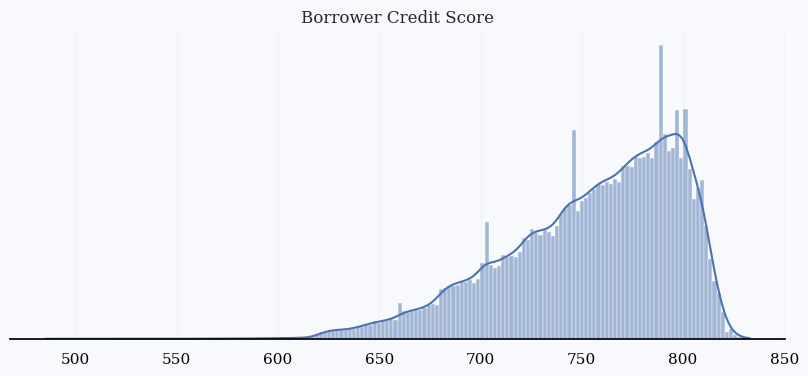

In [17]:

plt.figure(figsize=(10, 4))
sns.histplot(data=df_train, x='CSCORE_B', kde=True)
plt.title('Borrower Credit Score')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
sns.despine(left=True, bottom=False)
plt.show()

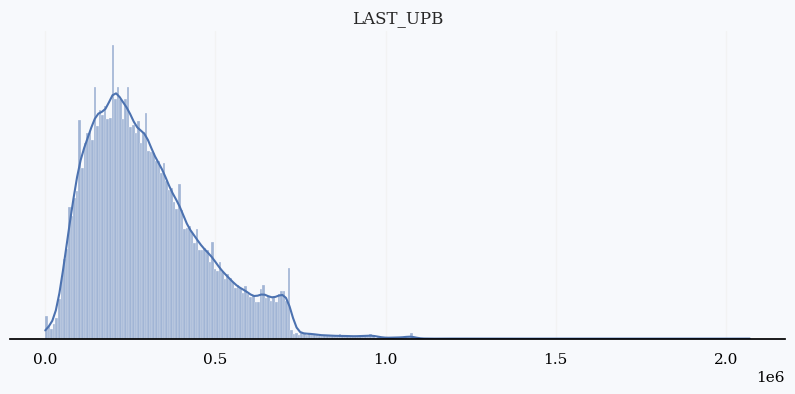

In [28]:

plt.figure(figsize=(10, 4))
sns.histplot(data=df_train, x='LAST_UPB', kde=True)
plt.title('LAST_UPB')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
sns.despine(left=True, bottom=False)
plt.show()

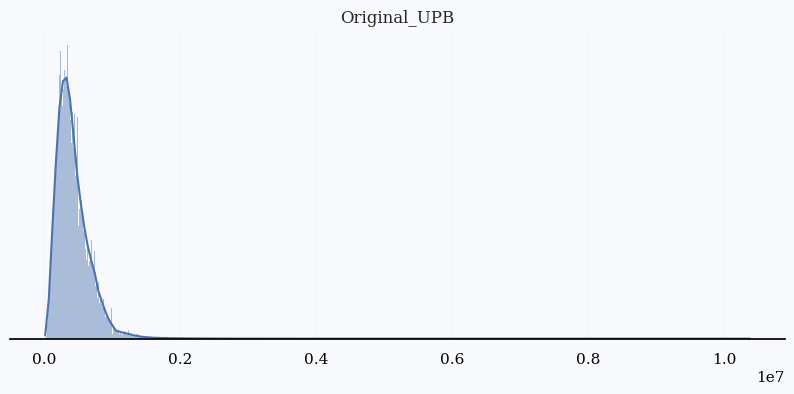

In [30]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df_train, x='ORIG_VAL', kde=True)
plt.title('Original_UPB')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
sns.despine(left=True, bottom=False)
plt.show()

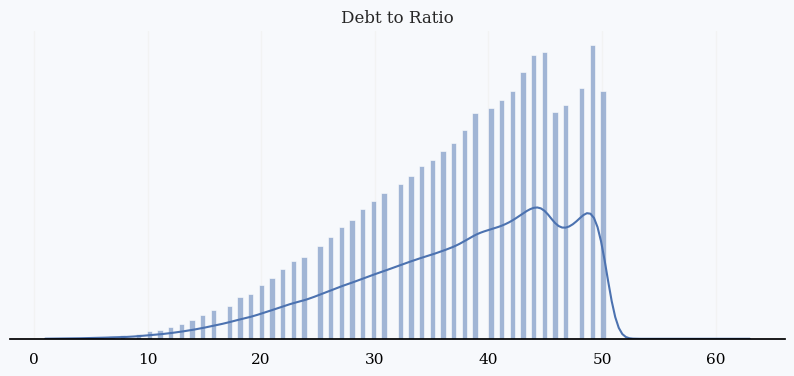

In [24]:

plt.figure(figsize=(10, 4))
sns.histplot(data=df_train, x='dti', kde=True)
plt.title('Debt to Ratio')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
sns.despine(left=True, bottom=False)
plt.show()

<Axes: ylabel='count'>

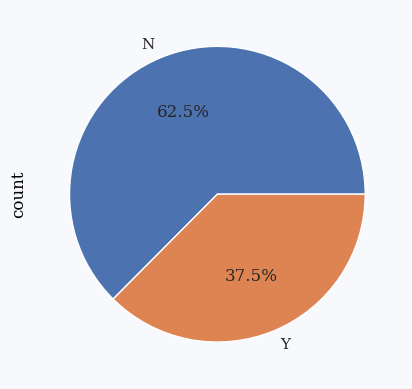

In [31]:
counts = df_train['FTHB_FLG'].value_counts()

# Plot value counts as pie chart
counts.plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='count'>

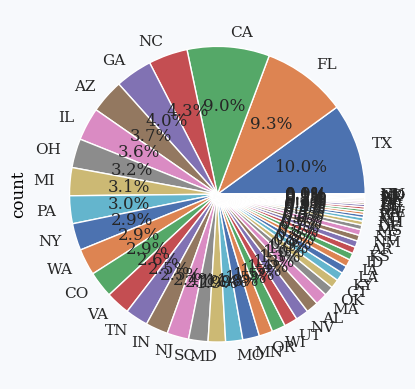

In [20]:
counts = df_train['state'].value_counts()

# Plot value counts as pie chart
counts.plot(kind='pie', autopct='%1.1f%%')

In [22]:
df_train.dropna(axis='columns')

,LOAN_ID,ORIG_CHN,SELLER,orig_rt,orig_amt,orig_trm,oltv,ocltv,num_bo,FTHB_FLG,purpose,PROP_TYP,NUM_UNIT,occ_stat,state,zip_3,relo_flg,AQSN_DTE,ORIG_DTE,FRST_DTE,LAST_RT,LAST_UPB,msa,repch_flag,LAST_ACTIVITY_DATE,SERVICER,MOD_FLAG,MODFG_COST,MODTRM_CHNG,MODUPB_CHNG,ORIG_VAL,LAST_DTE,LAST_STAT
0,135176712,B,Other,6.50,"206,000.00",360,60.00,60.00,1,N,P,PU,1,I,IL,605,N,2023-03-01,2023-01-01,2023-03-01,6.50,"203,301.16",16980,0,2024-03-01,Other,0,0.00,0.00,0.00,"343,333.33",2024-03-01,C
1,135176713,R,"Rocket Mortgage, LLC",6.38,"162,000.00",360,50.00,50.00,1,N,C,SF,1,P,NY,141,N,2023-03-01,2022-12-01,2023-02-01,6.38,"157,651.20",15380,0,2024-03-01,"Rocket Mortgage, LLC",0,0.00,0.00,0.00,"324,000.00",2024-03-01,C
2,135176714,B,"United Wholesale Mortgage, LLC",7.62,"206,000.00",360,75.00,75.00,2,N,P,PU,1,I,NC,284,N,2023-03-01,2022-12-01,2023-02-01,7.62,"193,793.10",34820,0,2024-03-01,"United Wholesale Mortgage, LLC",0,0.00,0.00,0.00,"274,666.67",2024-03-01,C
3,135176715,C,Other,6.75,"361,000.00",360,85.00,85.00,1,Y,P,SF,1,P,IL,605,N,2023-03-01,2022-12-01,2023-02-01,6.75,"356,732.76",16980,0,2024-03-01,Other,0,0.00,0.00,0.00,"424,705.88",2024-03-01,C
4,135176716,R,Other,7.00,"350,000.00",360,50.00,50.00,2,N,P,SF,1,P,UT,840,N,2023-03-01,2022-12-01,2023-02-01,7.00,"354,912.91",39340,0,2024-03-01,Other,0,0.00,0.00,0.00,"700,000.00",2024-03-01,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210805,135887964,C,"United Wholesale Mortgage, LLC",6.38,"405,000.00",360,43.00,43.00,1,Y,P,CO,1,P,CA,902,N,2023-03-01,2023-02-01,2023-04-01,6.38,"400,364.83",31080,0,2024-03-01,"United Wholesale Mortgage, LLC",0,0.00,0.00,0.00,"941,860.47",2024-03-01,C
210806,135887965,R,Other,7.12,"105,000.00",360,95.00,95.00,1,Y,P,MH,1,P,WI,547,N,2023-03-01,2023-01-01,2023-03-01,7.12,"102,937.52",0,0,2024-03-01,Other,0,0.00,0.00,0.00,"110,526.32",2024-03-01,C
210807,135887966,R,"Rocket Mortgage, LLC",6.12,"89,000.00",360,73.00,73.00,1,N,R,SF,1,P,TN,380,N,2023-03-01,2023-02-01,2023-04-01,6.12,"87,932.24",32820,0,2024-03-01,"Rocket Mortgage, LLC",0,0.00,0.00,0.00,"121,917.81",2024-03-01,C
210808,135887967,R,Other,5.75,"136,000.00",360,59.00,59.00,1,N,P,SF,1,P,WI,547,N,2023-03-01,2023-02-01,2023-04-01,5.75,"134,795.45",20740,0,2024-03-01,Other,0,0.00,0.00,0.00,"230,508.47",2024-03-01,P


In [26]:
skim(df_train.dropna(axis='columns')) 

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 210810 │ │ string      │ 15    │                                                          │
│ │ Number of columns │ 33     │ │ float64     │ 10    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 8     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃         ┃          ┃          ┃          ┃           ┃          ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd      ┃ p0       ┃ p25      ┃ p50      ┃ p75       ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ LOAN_ID  │  0 │    0 │ 13560000 │  270700 │ 13520000 │ 13520000 │ 13560000 │ 135800000 │ 13590000 │ ▇  ▆ ▇ │  │
│ │          │    │      │        0 │         │        0 │        0 │        0 │           │        0 │        │  │
│ │ orig_rt  │  0 │    0 │    6.329 │  0.6799 │     2.25 │     5.99 │     6.38 │      6.75 │     8.62 │   ▁▇▇▁ │  │
│ │ orig_amt │  0 │    0 │   312800 │  173800 │    12000 │   180000 │   280000 │    410000 │  2095000 │   ▇▃   │  │
│ │ orig_trm │  0 │    0 │    348.1 │   43.68 │       90 │      360 │      360 │       360 │      360 │      ▇ │  │
│ │ oltv     │  0 │    0 │    75.32 │   19.38 │        3 │       65 │       80 │        90 │       97 │  ▁▁▃▇▇ │  │
│ │ ocltv    │  0 │    0 │    75.62 │   19.52 │        3 │       66 │       80 │        92 │      105 │  ▁▂▃▇▇ │  │
│ │ num_bo   │  0 │    0 │    1.467 │  0.5393 │        1 │        1 │        1 │         2 │        5 │   ▇▆   │  │
│ │ NUM_UNIT │  0 │    0 │     1.02 │  0.1854 │        1 │        1 │        1 │         1 │        4 │   ▇    │  │
│ │ zip_3    │  0 │    0 │    534.1 │     285 │        6 │      301 │      490 │       797 │      999 │ ▃▇▆▃▆▇ │  │
│ │ LAST_RT  │  0 │    0 │    6.329 │  0.6799 │     2.25 │     5.99 │     6.38 │      6.75 │     8.62 │   ▁▇▇▁ │  │
│ │ LAST_UPB │  0 │    0 │   301400 │  171600 │        0 │   172500 │   268300 │    396000 │  2070000 │   ▇▃   │  │
│ │ msa      │  0 │    0 │    27060 │   13750 │        0 │    16980 │    29420 │     38060 │    49740 │ ▃▃▆▅▇▅ │  │
│ │ repch_fl │  0 │    0 │        0 │       0 │        0 │        0 │        0 │         0 │        0 │     ▇  │  │
│ │ ag       │    │      │          │         │          │          │          │           │          │        │  │
│ │ MOD_FLAG │  0 │    0 │ 0.000142 │ 0.01193 │        0 │        0 │        0 │         0 │        1 │   ▇    │  │
│ │          │    │      │        3 │         │          │          │          │           │          │        │  │
│ │ MODFG_CO │  0 │    0 │        0 │       0 │        0 │        0 │        0 │         0 │        0 │     ▇  │  │
│ │ ST       │    │      │          │         │          │          │          │           │          │        │  │
│ │ MODTRM_C │  0 │    0 │ 0.000137 │ 0.01173 │        0 │        0 │        0 │         0 │        1 │   ▇    │  │
│ │ HNG      │    │      │        6 │         │         